# Analysis & Logistic Regression implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

df = pd.read_csv("F:\\Jupyter\\Datasets\\titanic.csv")
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

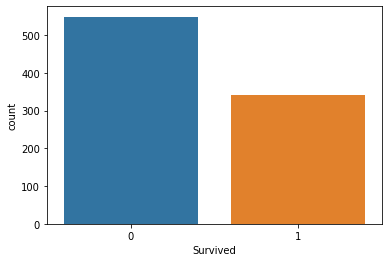

In [3]:
sns.countplot(x="Survived", data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

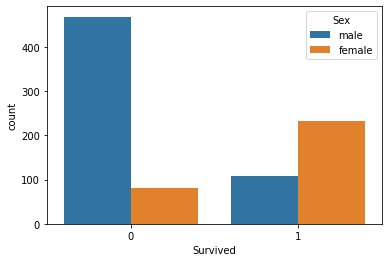

In [4]:
sns.countplot(x="Survived", hue="Sex", data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

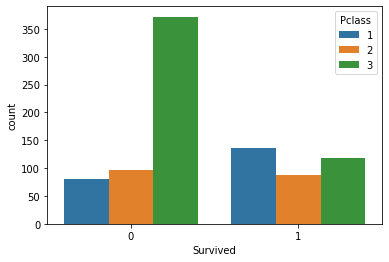

In [5]:
sns.countplot(x="Survived", hue="Pclass", data = df)

<AxesSubplot:ylabel='Frequency'>

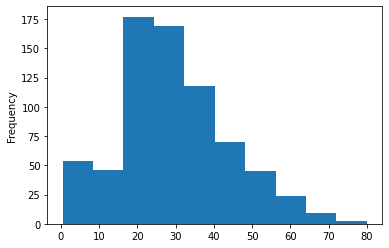

In [6]:
df["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

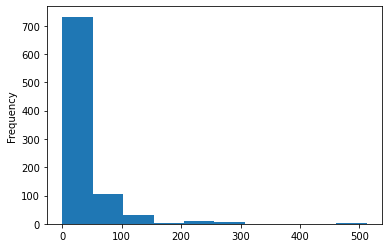

In [7]:
df["Fare"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

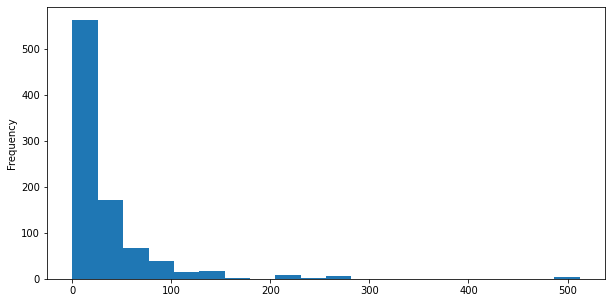

In [8]:
df["Fare"].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

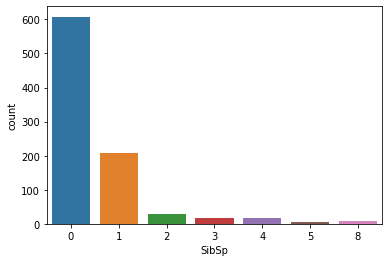

In [9]:
sns.countplot(x="SibSp",data=df)

## Data Wrangling

In [10]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

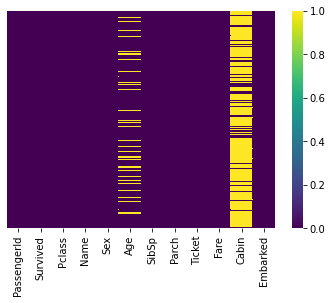

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

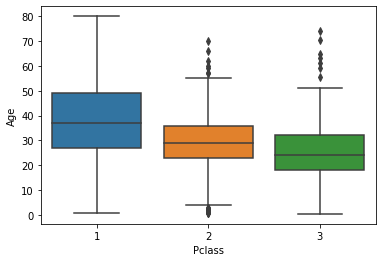

In [13]:
sns.boxplot(x="Pclass", y="Age", data = df)

In [14]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.drop("Cabin",axis=1,inplace=True)

In [16]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df.dropna(inplace=True)

<AxesSubplot:>

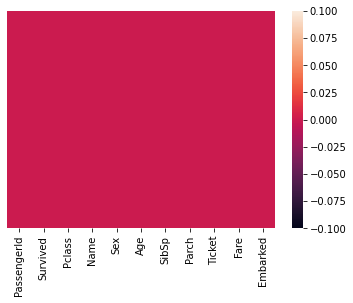

In [18]:
sns.heatmap(df.isnull(),yticklabels=False)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
pcl = pd.get_dummies(df['Pclass'],drop_first=True)
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [23]:
df = pd.concat([df,sex,embark,pcl],axis=1)

In [24]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [25]:
df.drop(['Sex','Pclass','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [26]:
df.head(5)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train Data

In [27]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
reg = LogisticRegression(max_iter=1000)

In [32]:
reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [33]:
predictions = reg.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       126
           1       0.72      0.72      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [45]:
math.ceil(accuracy_score(y_test,predictions)*100)

78